## Import Libraries

In [226]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

## Read and Explore the Data

#### Read MultipleLR csv file into numpy array
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [227]:
data = np.genfromtxt('MultipleLR.csv',delimiter=',',dtype=np.float64)

#### Explore data

In [228]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [229]:
np.shape(data)

(25, 4)

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [230]:
x, y = data[:, 0:3], data[:, 3]

In [231]:
print("Shape of X = ", np.shape(x))
print("independent variable : ", x)

Shape of X =  (25, 3)
independent variable :  [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


In [232]:
print("Shape of y = ", np.shape(y))
print("dependent variable : ", y)

Shape of y =  (25,)
dependent variable :  [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


#### Plot the original data (scatter plot of X,y)

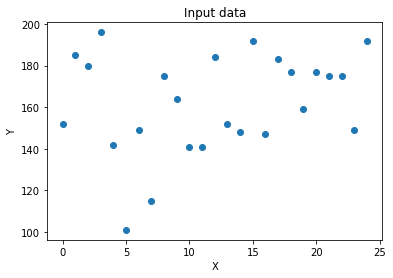

In [233]:
x_plot = np.arange(0, len(x), 1)

plt.scatter(x_plot, y)
plt.xlabel('X'); plt.ylabel('Y');
plt.title('Input data');

### Add column of ones to independent data

In [234]:
X = np.concatenate((np.ones((len(x), 1)), x), axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

## LR Full Implementation

### Step1: 
#### Initialize model parameters with zero.  
#### Choose value of the Learning rate. 

In [235]:
# Initialize parameters (theta_0 , theta_1)
theta = np.zeros(len(X[1]))

# Choose the Learning rate
alpha = 0.00001

### Step2: Predict the output h(x) = theta_0 + theta_1 * x

In [236]:
def hypothesis(X, y, theta):
    h = np.dot(X , theta)
    e = h - y
    return e

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).

In [237]:
def cost_fun(e, m):
    J = (1/(2*m))*( np.dot(e.T, e) )  
    return J

### Step4: Calculate the gradient.

In [238]:
def gradient(X, e, m):
    grad = (1/m) *( np.dot(X.T, e) )  
    return grad

### Step5: Update the model parameters (simultaneously).

In [239]:
def update(theta, grad, alpha):
    theta = theta - (alpha * grad)
    return theta

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

In [240]:
def MBGD(X, y, theta, alpha, num_iters, stopCriteria, batch_size): 
    J_history = [] 
    theta_history = []
    m = y.size
    cost = 0

    for _ in range(num_iters):
        flag = 0
        for j in range(m//batch_size):

            X_B = X[j*batch_size : (j+1)*batch_size]
            y_B = y[j*batch_size : (j+1)*batch_size]

            e = hypothesis(X_B, y_B, theta)
            J = cost_fun(e, batch_size)
            if abs(cost-J) < stopCriteria:
                flag = 1
                break
            cost = J

            grad = gradient(X_B, e, batch_size)
            
            theta = update(theta, grad, alpha)
            
        if flag == 1:
            break
        J_history.append(J)
        theta_history.append(theta)
        
    return theta_history, J_history

## Use GD model to predict y values 

In [241]:
theta_history, J_history = MBGD(X ,y, theta, alpha, num_iters=500, stopCriteria=0.001, batch_size=20)
optimal_theta = theta_history[-1]
y_pred = X @ optimal_theta

### Plot  LR equation output (fitted line) with the original data 

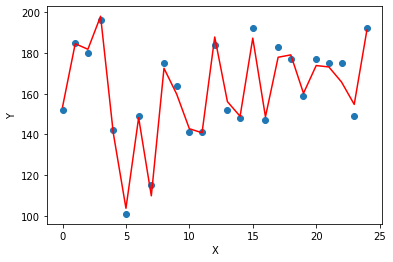

In [242]:
x_plot = np.arange(0, len(x), 1)

plt.scatter(x_plot, y)
plt.xlabel('X'); plt.ylabel('Y')
plt.plot(x_plot, y_pred, '-', color='r');

### Use R2 score to evaluate LR equation output

In [243]:
print("R2 Score = ", r2_score(y, y_pred))

R2 Score =  0.9786656787318616


## Plot loss vs. iterations

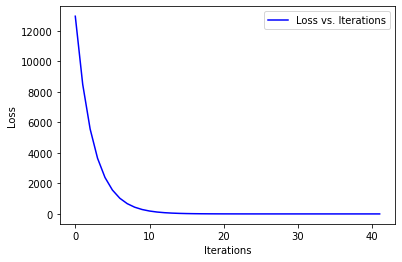

In [244]:
plt.plot(J_history, 'b', label='Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

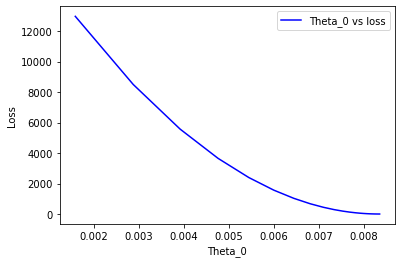

In [245]:
plt.plot(np.array(theta_history)[:,0], J_history, 'b', label='Theta_0 vs loss')
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()
plt.show()

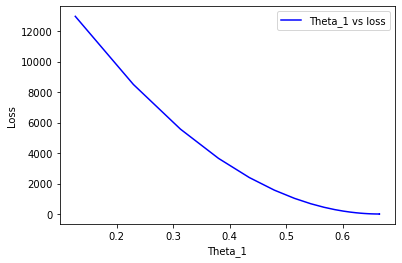

In [246]:
plt.plot(np.array(theta_history)[:,1], J_history, 'b', label='Theta_1 vs loss')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()
plt.show()

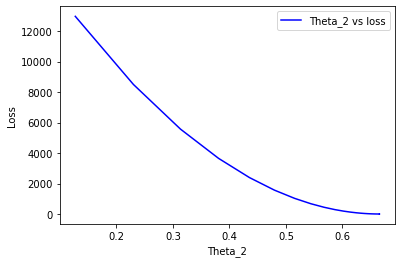

In [247]:
plt.plot(np.array(theta_history)[:,2], J_history, 'b', label='Theta_2 vs loss')
plt.xlabel('Theta_2')
plt.ylabel('Loss')
plt.legend()
plt.show()

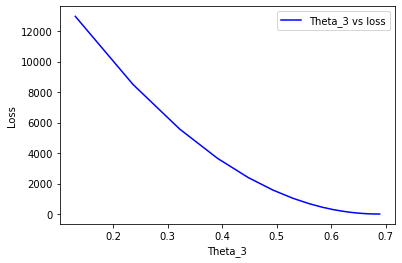

In [248]:
plt.plot(np.array(theta_history)[:,3], J_history, 'b', label='Theta_3 vs loss')
plt.xlabel('Theta_3')
plt.ylabel('Loss')
plt.legend()
plt.show()

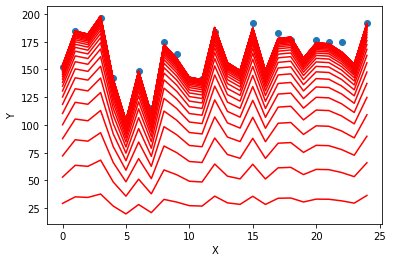

In [250]:
x_plot = np.arange(0, len(x), 1)

for i in range(len(theta_history)):
    theta = theta_history[i]
    y_pred = X @ theta
    plt.plot(x_plot, y_pred, '-', color='r')
plt.scatter(x_plot, y)
plt.xlabel('X'); plt.ylabel('Y');

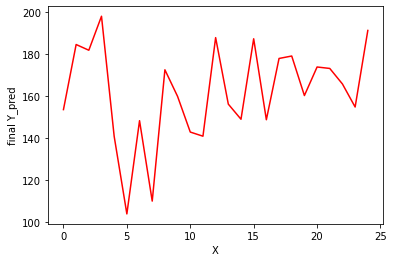

In [251]:
plt.xlabel('X'); plt.ylabel('final Y_pred')
plt.plot(x_plot, y_pred, '-', color='r');